# Creating a TensorFlow Image Classifier in AWS SageMaker
https://learn.acloud.guru/handson/251a68d5-db84-4145-a674-6ddac5911615

![A Cloud Guru](acg_logo.png)
<hr/>

<center><h1>Create a TensorFlow 2 Image Classifier</h1></center>

![Sorting Lego bricks](./lego.jpg)

<center><h2>LEGO Brick Sorting</h2></center>

# Frameworks
For this lab, we will be using TensorFlow 2 to build and train a model to classify images, and specifically take advantage of the Keras API provided with TensorFlow to make that process really easy.

## TensorFlow

TensorFlow is an end-to-end, open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries, and community resources. This lets researchers push the state-of-the-art in ML and developers easily build and deploy ML-powered applications.

_(Source: https://www.tensorflow.org/)_

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

_(Source: https://keras.io/)_

__Or, to put it another way:__

TensorFlow is a complex and powerful tool, but Keras provides a high-level interface that allows us to rapidly prototype models without dealing with all of the complexity TensorFlow offers.


# Scenario

We have bricks. Lots of bricks. LEGO bricks, that is. And we need to sort them.

We also have a collection of photos of various LEGO bricks from different angles. We have 600 photos (which probably took us more time to collect than sorting the current bricks) and they are all labeled with the brick type.

Each photo has been processed. This involved increasing the contrast, sharpening, removing the color, inverting the colors, and reducing the size.

|![Sample LEGO brick photo](./sample-before.png)|![Sample LEGO brick photo](./sample-after.png)|
|----------------------------------------|----------------------------------------|
| Sample before processing                | Sample after processing                |

In addition to this, we stored all the images into data arrays for easier loading into the notebook. These are stored in the `lego-simple-train-images.npy` and `lego-simple-test-images.npy` files.

We need to create a simple, deep learning, neural network classifier model. We will train the model using the photo data and see if it correctly predicts the type of a brick from a supplied test image.

# How to Use This Lab

All of the code is provided for you in this lab as our solution to the tasks presented. You could simply execute the notebook to get a result, but that's not really very hands-on and it won't teach you anything but how to execute cells in a Jupyter notebook. To get the most from this lab, you should understand what the code in each cell is trying to accomplish, and then take the time to experiment: make changes, break it, fix it, and learn! You can always pull the code down again to get a clean copy.

# 1) Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.3


This notebook requires TensorFlow 2. If the output version above is not 2.0.0 or later, double check that the kernel you are using has TensorFlow 2. If not, switch to a kernel that does and rerun the cell.

# 2) Load the Data

We have a dataset created from a set of photos of LEGO bricks. We have a total of 4 data arrays saved to files as NumPy arrays.

1. `lego-simple-train-images.npy` - Training images, around 80% of the data collected.
2. `lego-simple-train-labels.npy` - A list of integer labels identifying the classes of the training images.
3. `lego-simple-test-images.npy`  - Testing images, around 20% of the data collected.
4. `lego-simple-test-labels.npy`  - A list of integer labels identifying the classes of the testing images.

First, we load the data into arrays in the notebook.

In [2]:
train_images = np.load('lego-simple-train-images.npy')
train_labels = np.load('lego-simple-train-labels.npy')
test_images = np.load('lego-simple-test-images.npy')
test_labels = np.load('lego-simple-test-labels.npy')

The labels we loaded are integer values 1 through 10. Integer values are great for the model to understand and predict, but they are a hassle for us to understand as we are working with the data. Let's add some human-readable names for the labels we are trying to predict.

In [3]:
# For humans:
class_names = ['2x3 Brick', '2x2 Brick', '1x3 Brick', '2x1 Brick', '1x1 Brick', 
               '2x2 Macaroni', '2x2 Curved End', 'Cog 16 Tooth', '1x2 Handles', '1x2 Grill']

# Or the real LEGO codes:
# class_names = ['3002', '3003', '3622', '3004', '3005', '3063', '47457', '94925', '3839a', '2412b']

Let's take a look at one of the images loaded with the data.

In [4]:
print(train_images[0].shape)
train_images[0]

(48, 48)


array([[0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       ...,
       [0.03921569, 0.03921569, 0.03921569, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.03921569, 0.03921569, 0.03921569, ..., 0.01960784, 0.01960784,
        0.01960784],
       [0.03529412, 0.03529412, 0.03529412, ..., 0.01960784, 0.01960784,
        0.01960784]])

For good measure, let's also check out the testing data to make sure it is similar.

In [5]:
print(test_images[0].shape)
test_images[0]

(48, 48)


array([[0.00784314, 0.00784314, 0.00784314, ..., 0.00784314, 0.00784314,
        0.00784314],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.00784314, 0.00784314,
        0.00784314],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.00784314, 0.00784314,
        0.00784314],
       ...,
       [0.01568627, 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.01568627, 0.01568627,
        0.01568627],
       [0.01960784, 0.01960784, 0.01960784, ..., 0.01568627, 0.01568627,
        0.01568627]])

From this, we can tell each data point is a 48x48 matrix of floating point values. Each value in the matrix is the brightness of a pixel in the image, ranging from 0 to 1. Let's plot these values to get a better picture. Sorry, not sorry.

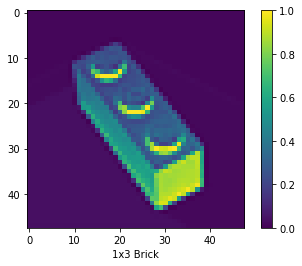

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.xlabel(class_names[train_labels[0]])
plt.show()

We can see the top and bottom few rows are dark. As we saw above, thosee floating point values are close to zero. Let's look at some more data with nicer formatting. This will shift the output colors (but not the raw data!) so the background is light and the bricks are dark, making them a bit easier to see.

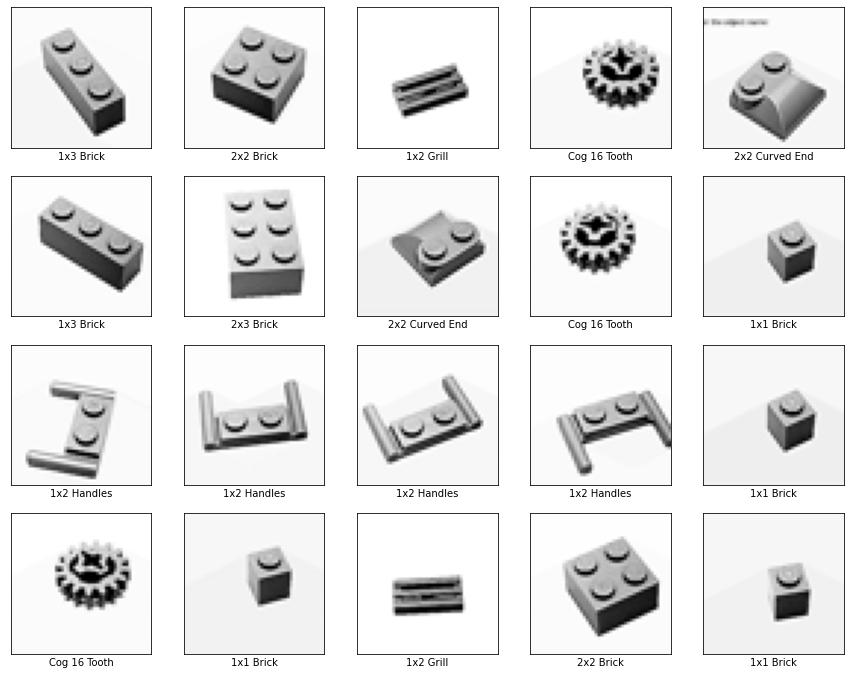

In [7]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 3) Create the Model

Now the data is loaded, and we have an idea of what we're working with, so let's teach the machine what we're working with. First, we need to create a model. We're creating an artificial neural network. It has three layers.

1. The input layer with enough nodes for our image data. 
2. A hidden layer with 128 nodes.
3. An output layer with 10 nodes, one for each of the classes we want to identify.

The first layer is doing a bit of data processing for us. It will change the input from a 48x48 matrix to a 2,304 value arary. This allows the input to be densely connected to the next layer. We could have also done this step outside of the model, but we would also have to do the same conversion to the data we are trying to predict before sending it to the trained model. Using the Flatten layer saves us a data preprocessing step during prediction, since that data is also formatted as 48x48 matrixes.

Each layer is densely connected, meaning each neuron in one layer is connected to every neuron in the next layer.

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Now we compile the model.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally, it's time to train the model. Note the epochs and watch the accuracy as it processes.

In [10]:
history = model.fit(train_images, train_labels, epochs=4)

[2022-04-17 23:18:19.087 ip-172-16-189-105:20608 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-04-17 23:18:19.175 ip-172-16-189-105:20608 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
Train on 451 samples
Epoch 1/4
451/451 [==============================] - 1s 2ms/sample - loss: 1.9657 - accuracy: 0.3126
Epoch 2/4
451/451 [==============================] - 0s 188us/sample - loss: 1.0419 - accuracy: 0.7517
Epoch 3/4
451/451 [==============================] - 0s 164us/sample - loss: 0.5912 - accuracy: 0.8891
Epoch 4/4
451/451 [==============================] - 0s 175us/sample - loss: 0.3587 - accuracy: 0.9224


You can see from the output above that with each epoch, the model gets a greater accuracy score. When we trained the model, we stored the ```history``` of the training in a variable so we can draw a graph of how the training process progressed. We can plot accuracy and loss over the epochs.

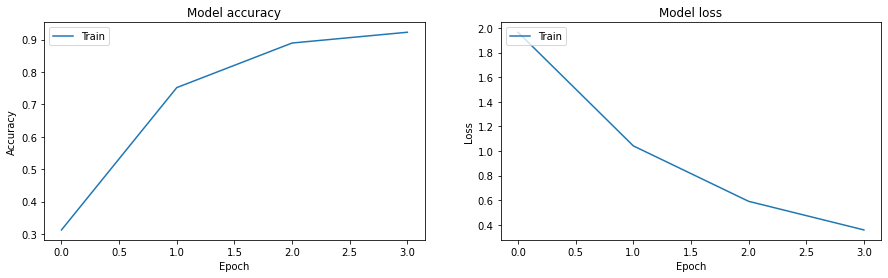

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 4) Evaluate the Model

Accuracy while training is one thing. Let's calculate accuracy against the __testing data__. If the accuracy achieved during training is much greater than what we calculate for the testing data, the model is probably overfit. This means it works well to classify training data but not testing data.

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

150/150 [==============================] - 0s 1ms/sample - loss: 0.4108 - accuracy: 0.9000
Test accuracy: 0.9


Let's use our model to make some predictions using our testing data. Remember the model hasn't 'seen' our testing data, not during training anyway. So when we make predictions using testing images, it's doing real work.

## Single Prediction

Let's grab one of the images from the test dataset.

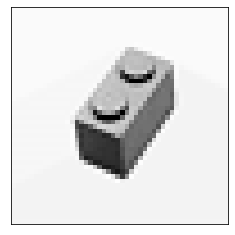

In [13]:
test_image_number = 8

img = test_images[test_image_number]
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

We need to do one quick transformation of this image before we can see what the model thinks. The ```predict``` method expects a collection of images, so we create a collection of one image.

In [14]:
img = (np.expand_dims(img,0))
img.shape

(1, 48, 48)

The shape is now a collection of 1 piece of data that is 48x48. Next, we pass our image to the ```predict``` method. The result is a list of probabilities that the image is a certain class.

In [15]:
predictions_single = model.predict(img)
predictions_single

array([[0.00090624, 0.02473705, 0.00675821, 0.3166028 , 0.11906122,
        0.47708622, 0.02980625, 0.01031557, 0.00700068, 0.0077257 ]],
      dtype=float32)

Those are not not very easy for us to look at. Luckily, NumPy has a handy function called `argmax` to find the index of the largest value in the list, which saves us having to look! We can use a second NumPy method to find the actual `max` value.

In [16]:
prediction_result = np.argmax(predictions_single[0])
probability = np.max(predictions_single[0])
print(f"Predicted class {prediction_result}, which is {class_names[prediction_result]}.")
print(f"The model thinks there is a {probability*100:.2f}% probability of this brick being correct.")

Predicted class 5, which is 2x2 Macaroni.
The model thinks there is a 47.71% probability of this brick being correct.


Did we get it right? Let's lookup the class name for the test image (i.e. the real class name, not the predicted one). We hope they are the same! Did the model get it right?

In [17]:
class_names[test_labels[test_image_number]]

'2x1 Brick'

Here are a couple of functions to help with the display of the prediction data.

In [18]:
# Function to display the image:
def plot_image(predictions_array, true_label, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    predicted_probability = 100 * np.max(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'
    # Print a label with 'predicted class', 'probability %', 'actual class'
    plt.xlabel(f"{class_names[predicted_label]} {predicted_probability:2.0f}% ({class_names[true_label]})",
                                color=color)
    
# Function to display the prediction results in a graph:
def plot_value_array(predictions_array, true_label):
    plt.xticks(range(10))
    plt.yticks([])
    plot = plt.bar(range(10), predictions_array, color="#777777")
    predicted_label = np.argmax(predictions_array)
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('green')

Let's plot a bar chart using the helper function. This gives us a sense of how well the model classified this image. The predicted label will be red if it is different than the actual label. The actual label will be green.

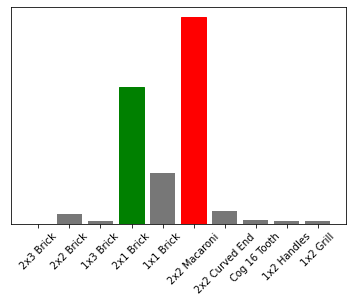

In [19]:
plot_value_array(predictions_single[0], test_labels[test_image_number])
plt.xticks(range(10), class_names, rotation=45)
plt.show()

We can more easily see how likely the model thinks each label is.

## Batch Prediction

Now let's get prediction values for **all** the test images we have.

In [20]:
predictions = model.predict(test_images)

In [21]:
predictions[0]

array([7.5095035e-03, 9.2902821e-01, 3.7504123e-03, 2.8324181e-03,
       1.4999746e-05, 2.9393505e-02, 1.5773518e-02, 9.8057752e-03,
       5.6918332e-04, 1.3224853e-03], dtype=float32)

Finally, let's use our helper functions to summarize the first 16 images in our test data. How did we do?

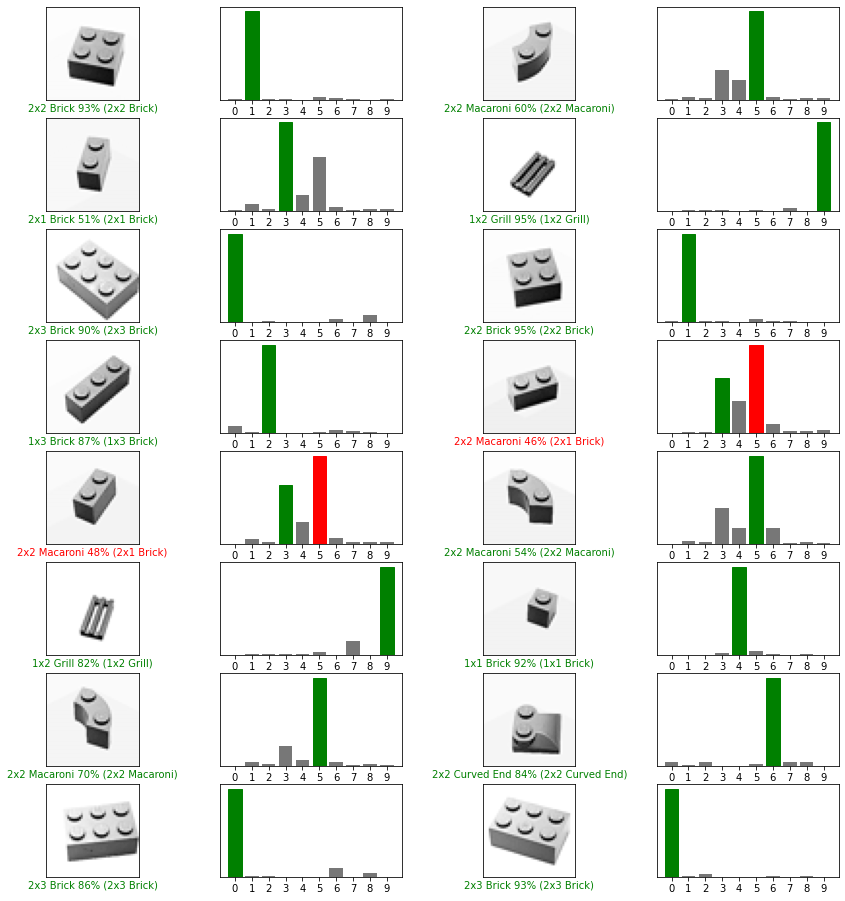

In [22]:
num_rows = 8
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(15, 16))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(predictions[i], test_labels[i], test_images[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(predictions[i], test_labels[i])
plt.show()

With our model being about 90% accurate, 1 or 2 of those might be labeled incorrectly. That's still not bad for only training for 4 epochs on the relatively small amount of data we have!

## Conclusion

Is about 90% accuracy good enough for you? Are you willing to have about 1 in 10 of your bricks in the wrong place for the advantage of not having to manually decide which type of brick you are sorting? That's up to you! You can also analyze which bricks the model is consistently getting wrong and reorganize those bins yourself once the model is finished. Machine learning is just one tool and one option.

Use the rest of your lab time to experiment with the model architecture to see if you can improve on your current accuracy. You can also change the number of training epochs, but be careful not to overfit your model!